# A/B Test Assignment

New feature evaluation experiment:

Overview: Use the attached data (in csv format) to evaluate a **50/50** **A/B test** and recommend whether or not to release the tested product feature based on the test results. 
Deliverable: Compile your analyses and share your findings in a written report.
The company helps its customers grow their apps user base with powerful machine learning models designed to identify users most likely to install and engage with the customers apps. We serve ads to these identified users promoting our customers apps. The end goal is for these users to install the advertised app after seeing our ad. 

Our machine learning engineers recently developed a new feature for our model that can potentially increase the number of view-through install conversions. 

Before putting this model into production, we performed a **50/50 AB test** to verify if this new feature truly improves performance. The user traffic is randomly assigned to either the control or the experiment group. As a product analyst, please analyze the AB test results (data is attached) and recommend whether or not we should launch this feature. 


Glossary 

**Spend: the amount of money spent serving ads to users** 

**Impressions: the number of times an ad is shown to users**

**Installs: the number of users who download the advertised app onto their mobile devices, installs are further identified as either click-through installs or view-through installs where:**

**click through install (aka CT install) = an install that was acquired after the user saw an ad and clicked on the ad** 

**view through install (aka VT install) = an install that was acquired after the user saw an ad (did not click on the ad)** 

Note: that some of our customers are more sensitive than others to increases in view-through installs because these customers believe **click-through** installs have a higher signal of intent to engage with the app than **view-through** installs. 

In [1]:
# Packages imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import seaborn as sns
from math import ceil

# Let's look into the csv file and clean the tables if necessary

In [2]:
# Read the CSV file
data = pd.read_csv('take_home_assignment_data_table_1.csv')

# Drop rows where all cells are NaN
data = data.dropna(axis=0, how='all')
data = data.drop('Unnamed: 7', axis=1)


In [3]:
data

,﻿Day of date,customer,ab test group name,customer sensitive to VT,impressions,installs,spend
0,2-Sep-22,customer_1,control,False,"10,874,240","3,819",41172.0
1,2-Sep-22,customer_1,experiment,False,"33,278,986","4,202",41375.0
2,2-Sep-22,customer_2,control,False,"32,539,366","3,137",7611.0
3,2-Sep-22,customer_2,experiment,False,"23,954,676","3,189",7633.0
4,2-Sep-22,customer_3,control,False,"30,987,321","3,098",13638.0
...,...,...,...,...,...,...,...
895,16-Sep-22,customer_28,experiment,False,"6,143,553",595,2992.0
896,16-Sep-22,customer_29,control,False,"2,255,767",43,554.0
897,16-Sep-22,customer_29,experiment,False,"987,660",47,557.0
898,16-Sep-22,customer_30,control,False,"2,513,093",651,5920.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ﻿Day of date              900 non-null    object 
 1   customer                  900 non-null    object 
 2   ab test group name        900 non-null    object 
 3   customer sensitive to VT  900 non-null    object 
 4   impressions               900 non-null    object 
 5   installs                  900 non-null    object 
 6   spend                     900 non-null    float64
dtypes: float64(1), object(6)
memory usage: 56.2+ KB


In [5]:
data2 = pd.read_csv('take_home_assignment_data_table_2.csv')
data2

,﻿Day of date,customer,ab test group name,is viewthrough install,installs
0,2-Sep-22,customer_1,control,False,"3,634"
1,2-Sep-22,customer_1,control,True,185
2,2-Sep-22,customer_1,experiment,False,"3,266"
3,2-Sep-22,customer_1,experiment,True,936
4,2-Sep-22,customer_2,control,False,"2,860"
...,...,...,...,...,...
1781,16-Sep-22,customer_29,experiment,True,11
1782,16-Sep-22,customer_30,control,False,629
1783,16-Sep-22,customer_30,control,True,22
1784,16-Sep-22,customer_30,experiment,False,551


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ﻿Day of date            1786 non-null   object
 1   customer                1786 non-null   object
 2   ab test group name      1786 non-null   object
 3   is viewthrough install  1786 non-null   bool  
 4   installs                1786 non-null   object
dtypes: bool(1), object(4)
memory usage: 57.7+ KB


# I want to merge some data from csv file 2 to csv file 1
I know that in csv file 2, is view through install is False, mean customer installs via clickthrough install.
Therefore, I want to create 2 columns in csv file 1 = [clickthrough install, viewthrough install]

# Step 1:

I need to filter out for False data under **is viewthrough install**

In [7]:
# Load CSV file 2
data2 = pd.read_csv('take_home_assignment_data_table_2.csv')

filtered_df = data2[data2['is viewthrough install'] == False]
filtered_df.to_csv('take_home_assignment_data_table_2.csv', index=False)

filtered_df

,﻿Day of date,customer,ab test group name,is viewthrough install,installs
0,2-Sep-22,customer_1,control,False,"3,634"
2,2-Sep-22,customer_1,experiment,False,"3,266"
4,2-Sep-22,customer_2,control,False,"2,860"
6,2-Sep-22,customer_2,experiment,False,"2,843"
8,2-Sep-22,customer_3,control,False,"2,511"
...,...,...,...,...,...
1776,16-Sep-22,customer_28,experiment,False,410
1778,16-Sep-22,customer_29,control,False,31
1780,16-Sep-22,customer_29,experiment,False,36
1782,16-Sep-22,customer_30,control,False,629


# Step 2

I want to copy all installs filtered under False in **CSV file 2** to **CSV file 1** and rename it as **clickthrough install**

In [8]:
# Recall CSV file 2 
data2 = pd.read_csv('take_home_assignment_data_table_2.csv')  

# Replace 'column_to_copy' with the name of the column you want to copy
column_data = data2['installs']

# Replace 'new_column_name' with what you want to name the new column
data['clickthrough install'] = column_data

data

,﻿Day of date,customer,ab test group name,customer sensitive to VT,impressions,installs,spend,clickthrough install
0,2-Sep-22,customer_1,control,False,"10,874,240","3,819",41172.0,"3,634"
1,2-Sep-22,customer_1,experiment,False,"33,278,986","4,202",41375.0,"3,266"
2,2-Sep-22,customer_2,control,False,"32,539,366","3,137",7611.0,"2,860"
3,2-Sep-22,customer_2,experiment,False,"23,954,676","3,189",7633.0,"2,843"
4,2-Sep-22,customer_3,control,False,"30,987,321","3,098",13638.0,"2,511"
...,...,...,...,...,...,...,...,...
895,16-Sep-22,customer_28,experiment,False,"6,143,553",595,2992.0,410
896,16-Sep-22,customer_29,control,False,"2,255,767",43,554.0,31
897,16-Sep-22,customer_29,experiment,False,"987,660",47,557.0,36
898,16-Sep-22,customer_30,control,False,"2,513,093",651,5920.0,629


# Step 3

Now I want to add another column which is viewthrough install. Based on my observations, I can deduce that: 

**installs - clickthrough install = viewthrough install**

To ensure that it works, I need to look at the data type and change installs & clickthrough installs to perform the calculation.

I also need to remove all the commas in 

In [9]:
# Remove commas and change certain values to int
data['impressions'] = data['impressions'].replace(',', '', regex=True).astype(int)
data['installs'] = data['installs'].replace(',', '', regex=True).astype(int)
data['spend'] = data['spend'].replace(',', '', regex=True).astype(int)
data['clickthrough install'] = data['clickthrough install'].replace(',', '', regex=True).astype(int)

data

,﻿Day of date,customer,ab test group name,customer sensitive to VT,impressions,installs,spend,clickthrough install
0,2-Sep-22,customer_1,control,False,10874240,3819,41172,3634
1,2-Sep-22,customer_1,experiment,False,33278986,4202,41375,3266
2,2-Sep-22,customer_2,control,False,32539366,3137,7611,2860
3,2-Sep-22,customer_2,experiment,False,23954676,3189,7633,2843
4,2-Sep-22,customer_3,control,False,30987321,3098,13638,2511
...,...,...,...,...,...,...,...,...
895,16-Sep-22,customer_28,experiment,False,6143553,595,2992,410
896,16-Sep-22,customer_29,control,False,2255767,43,554,31
897,16-Sep-22,customer_29,experiment,False,987660,47,557,36
898,16-Sep-22,customer_30,control,False,2513093,651,5920,629


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ﻿Day of date              900 non-null    object
 1   customer                  900 non-null    object
 2   ab test group name        900 non-null    object
 3   customer sensitive to VT  900 non-null    object
 4   impressions               900 non-null    int64 
 5   installs                  900 non-null    int64 
 6   spend                     900 non-null    int64 
 7   clickthrough install      900 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 63.3+ KB


# Step 4

From the above table, we can see that I have changed some column to integers. 
We can now perform the creation of the **viewthorugh installs column**

**installs - clickthrough install = viewthrough install**

In [11]:
data['viewthrough install'] = data['installs'] - data['clickthrough install']

data

,﻿Day of date,customer,ab test group name,customer sensitive to VT,impressions,installs,spend,clickthrough install,viewthrough install
0,2-Sep-22,customer_1,control,False,10874240,3819,41172,3634,185
1,2-Sep-22,customer_1,experiment,False,33278986,4202,41375,3266,936
2,2-Sep-22,customer_2,control,False,32539366,3137,7611,2860,277
3,2-Sep-22,customer_2,experiment,False,23954676,3189,7633,2843,346
4,2-Sep-22,customer_3,control,False,30987321,3098,13638,2511,587
...,...,...,...,...,...,...,...,...,...
895,16-Sep-22,customer_28,experiment,False,6143553,595,2992,410,185
896,16-Sep-22,customer_29,control,False,2255767,43,554,31,12
897,16-Sep-22,customer_29,experiment,False,987660,47,557,36,11
898,16-Sep-22,customer_30,control,False,2513093,651,5920,629,22


# Step 5

Create columns: 

1. VT installations conversion
2. CT installations conversion
3. Total installations conversion
4. Cost per impressions

In [12]:
# Calculate the conversion rate and cost per impressions
data['viewthrough conversion rate'] = data['viewthrough install'] / data['impressions'] * 100
data['clickthrough conversion rate'] = data['clickthrough install'] / data['impressions'] * 100
data['installs conversion rate'] = data['installs'] / data['impressions'] * 100
data['cost per impression'] = data['spend'] / data['impressions'] * 1000

data.to_csv('take_home_assignment_data_table_1.csv', index=False)

data


,﻿Day of date,customer,ab test group name,customer sensitive to VT,impressions,installs,spend,clickthrough install,viewthrough install,viewthrough conversion rate,clickthrough conversion rate,installs conversion rate,cost per impression
0,2-Sep-22,customer_1,control,False,10874240,3819,41172,3634,185,0.001701,0.033418,0.035120,3.786196
1,2-Sep-22,customer_1,experiment,False,33278986,4202,41375,3266,936,0.002813,0.009814,0.012627,1.243277
2,2-Sep-22,customer_2,control,False,32539366,3137,7611,2860,277,0.000851,0.008789,0.009641,0.233901
3,2-Sep-22,customer_2,experiment,False,23954676,3189,7633,2843,346,0.001444,0.011868,0.013313,0.318643
4,2-Sep-22,customer_3,control,False,30987321,3098,13638,2511,587,0.001894,0.008103,0.009998,0.440115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,16-Sep-22,customer_28,experiment,False,6143553,595,2992,410,185,0.003011,0.006674,0.009685,0.487015
896,16-Sep-22,customer_29,control,False,2255767,43,554,31,12,0.000532,0.001374,0.001906,0.245593
897,16-Sep-22,customer_29,experiment,False,987660,47,557,36,11,0.001114,0.003645,0.004759,0.563959
898,16-Sep-22,customer_30,control,False,2513093,651,5920,629,22,0.000875,0.025029,0.025904,2.355663


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 899
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ﻿Day of date                  900 non-null    object 
 1   customer                      900 non-null    object 
 2   ab test group name            900 non-null    object 
 3   customer sensitive to VT      900 non-null    object 
 4   impressions                   900 non-null    int64  
 5   installs                      900 non-null    int64  
 6   spend                         900 non-null    int64  
 7   clickthrough install          900 non-null    int64  
 8   viewthrough install           900 non-null    int64  
 9   viewthrough conversion rate   900 non-null    float64
 10  clickthrough conversion rate  900 non-null    float64
 11  installs conversion rate      900 non-null    float64
 12  cost per impression           900 non-null    float64
dtypes: float64

# Visualizations

Plot the average daily metrics for control vs experiment of view-through, clickthrough, installs and spend

# Control vs. Experiment - view-through, click-through, total installs & spend

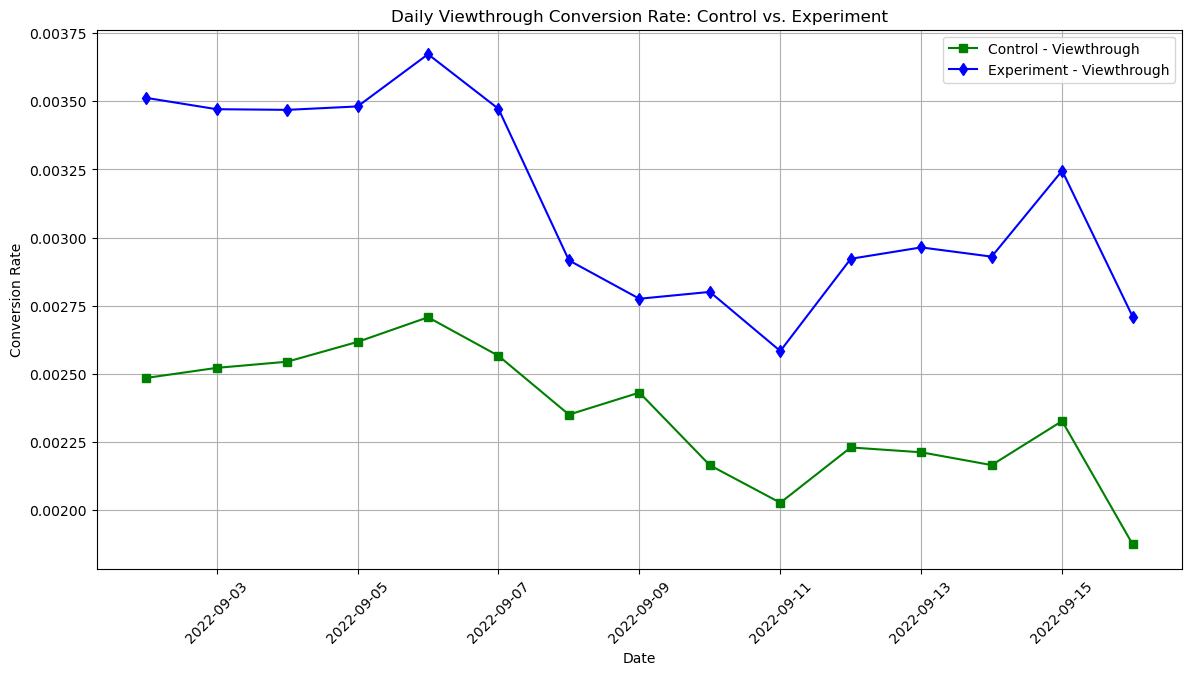

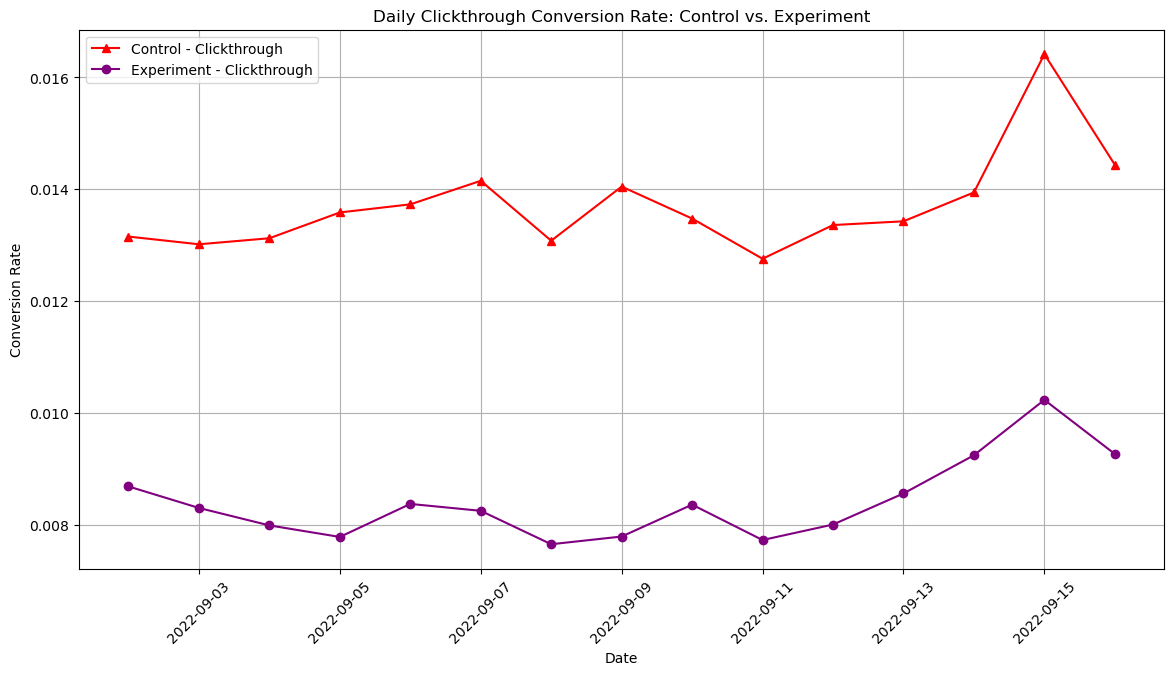

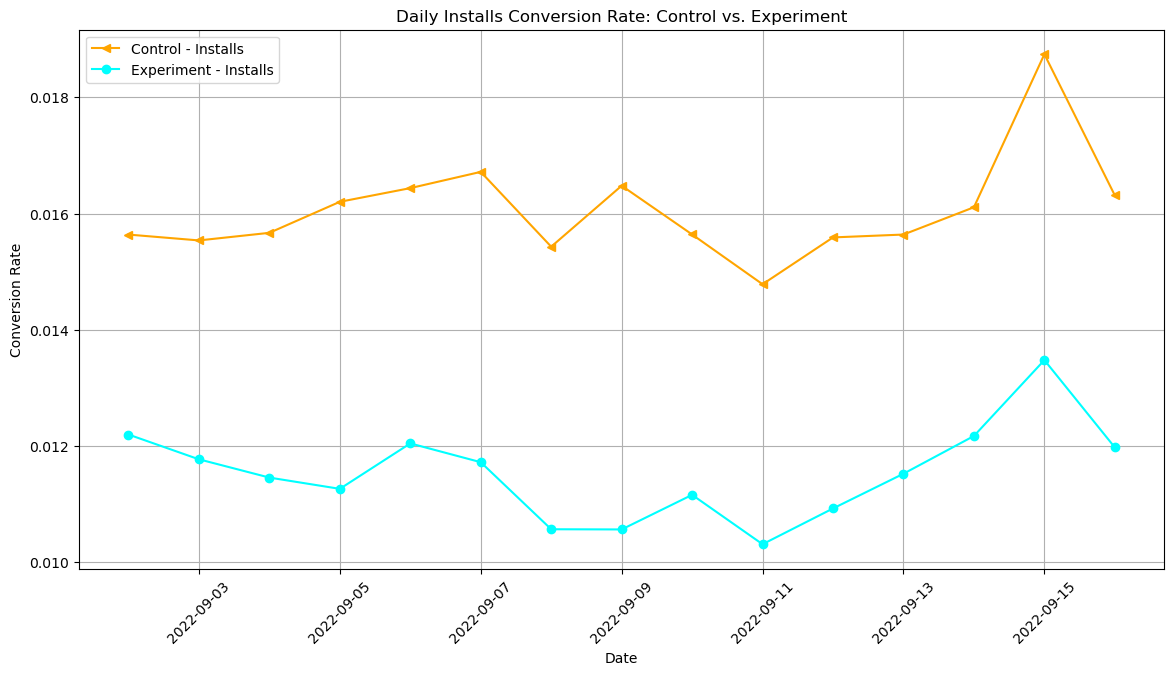

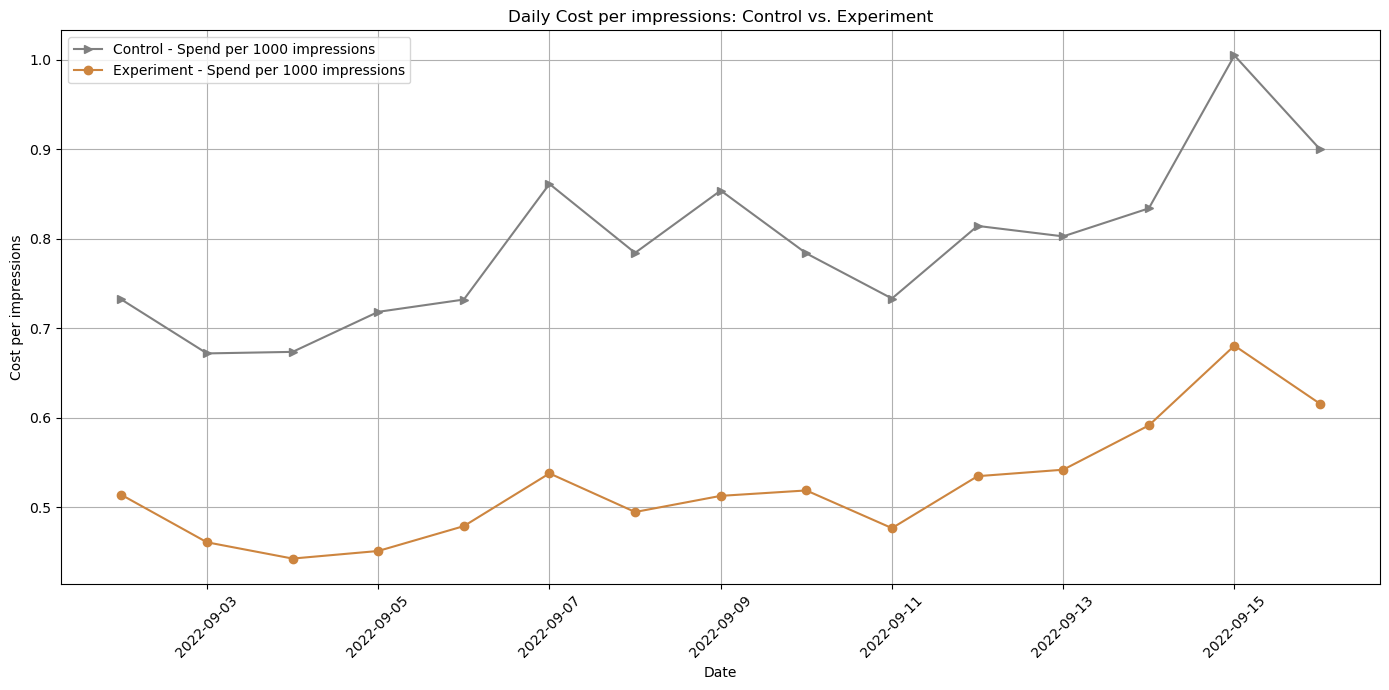

In [14]:
data = pd.read_csv('take_home_assignment_data_table_1.csv')

# Convert 'Day of date' to datetime
data['Day of date'] = pd.to_datetime(data['Day of date'], format='%d-%b-%y')

# # Sort the data by 'Day of date'
sorted_data = data.sort_values(by='Day of date')

# Group data by 'Day of date' and 'ab test group name'
grouped_sorted = sorted_data.groupby(['Day of date', 'ab test group name']).agg({
    'impressions': 'sum', 
    'viewthrough install': 'sum',
    'clickthrough install': 'sum',
    'spend': 'sum',
    'installs': 'sum'
})

grouped_sorted['viewthrough_conversion_rate'] = grouped_sorted['viewthrough install'] / grouped_sorted['impressions'] * 100
grouped_sorted['clickthrough_conversion_rate'] = grouped_sorted['clickthrough install'] / grouped_sorted['impressions'] * 100
grouped_sorted['installs_conversion_rate'] = grouped_sorted['installs'] / grouped_sorted['impressions'] * 100
grouped_sorted['cost_per_impressions'] = grouped_sorted['spend'] / grouped_sorted['impressions'] * 1000


# Reset index for plots
grouped_sorted_reset = grouped_sorted.reset_index()

# Pivot data for plotting
pivot_sorted_vt = grouped_sorted_reset.pivot(index='Day of date', columns='ab test group name', values='viewthrough_conversion_rate')
pivot_sorted_ct = grouped_sorted_reset.pivot(index='Day of date', columns='ab test group name', values='clickthrough_conversion_rate')
pivot_sorted_it = grouped_sorted_reset.pivot(index='Day of date', columns='ab test group name', values='installs_conversion_rate')
pivot_sorted_spend = grouped_sorted_reset.pivot(index='Day of date', columns='ab test group name', values='cost_per_impressions')

# Plot the Viewthrough Conversion Rate
plt.figure(figsize=(14, 7))
plt.plot(pivot_sorted_vt.index, pivot_sorted_vt['control'], label='Control - Viewthrough', marker='s', color='green')
plt.plot(pivot_sorted_vt.index, pivot_sorted_vt['experiment'], label='Experiment - Viewthrough', marker='d', color='blue')
plt.title('Daily Viewthrough Conversion Rate: Control vs. Experiment')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Plot the Clickthrough Conversion Rate
plt.figure(figsize=(14, 7))
plt.plot(pivot_sorted_ct.index, pivot_sorted_ct['control'], label='Control - Clickthrough', marker='^', color='red')
plt.plot(pivot_sorted_ct.index, pivot_sorted_ct['experiment'], label='Experiment - Clickthrough', marker='o', color='purple')
plt.title('Daily Clickthrough Conversion Rate: Control vs. Experiment')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Plot Installs Conversion Rate
plt.figure(figsize=(14, 7))
plt.plot(pivot_sorted_it.index, pivot_sorted_it['control'], label='Control - Installs', marker='<', color='orange')
plt.plot(pivot_sorted_it.index, pivot_sorted_it['experiment'], label='Experiment - Installs', marker='o', color='cyan')
plt.title('Daily Installs Conversion Rate: Control vs. Experiment')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Plot Cost per impressions
plt.figure(figsize=(14, 7))
plt.plot(pivot_sorted_spend.index, pivot_sorted_spend['control'], label='Control - Spend per 1000 impressions', marker='>', color='grey')
plt.plot(pivot_sorted_spend.index, pivot_sorted_spend['experiment'], label='Experiment - Spend per 1000 impressions', marker='o', color='peru')
plt.title('Daily Cost per impressions: Control vs. Experiment')
plt.xlabel('Date')
plt.ylabel('Cost per impressions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The analysis of the provided charts yields several key insights into the performance of the experimental and control groups:

The experimental group consistently exhibits higher view-through conversion rates than the control group. This suggests that the interventions or optimizations implemented in the experimental group may be effectively enhancing user propensity to install the app post-ad view, without direct interaction.

Conversely, the control group frequently surpasses the experimental group in click-through conversion rates. This observation implies that the feature tested may not be conducive to click-through engagements.

The pattern observed in total installations aligns more closely with the click-through conversion rates of the control group, indicating that the enhancements in view-through conversions within the experimental group do not sufficiently increase the overall performance compared to the control group.

The experimental group shows lower costs per impression, pointing to improved efficiency in ad delivery. Conversely, higher costs in the experimental group would have suggested inefficiencies potentially introduced by the new feature.

Moving forward, a more detailed statistical analysis will be necessary to thoroughly understand these trends and ascertain the overall impact of the experimental interventions.


To really determine that the experiment did improve, we need to look further into determining the confidence intervals and p value. **Do take note that in this data, there might be biasness as there are still a group of customer that are sensitive to viewthrough** 

# Distributions of view, click & installs conversion rate

In [15]:
# I need to re-group it by adding customer to the grouping
customer_daily_grouped = sorted_data.groupby(['Day of date', 'customer', 'ab test group name']).agg({
    'impressions': 'sum', 
    'viewthrough install': 'sum',
    'clickthrough install': 'sum',
    'spend': 'sum',
    'installs': 'sum'
})

customer_daily_grouped['viewthrough_conversion_rate'] = customer_daily_grouped['viewthrough install'] / customer_daily_grouped['impressions'] * 100
customer_daily_grouped['clickthrough_conversion_rate'] = customer_daily_grouped['clickthrough install'] / customer_daily_grouped['impressions'] * 100
customer_daily_grouped['installs_conversion_rate'] = customer_daily_grouped['installs'] / customer_daily_grouped['impressions'] * 100
customer_daily_grouped['cost_per_impressions'] = customer_daily_grouped['spend'] / customer_daily_grouped['impressions'] * 1000

# Reset index for sorting
customer_daily_grouped_reset = customer_daily_grouped.reset_index()

# Sort the data by 'Day of date' and 'customer'
sorted_customer_daily = customer_daily_grouped_reset.sort_values(by=['Day of date', 'customer'])

sorted_customer_daily

,Day of date,customer,ab test group name,impressions,viewthrough install,clickthrough install,spend,installs,viewthrough_conversion_rate,clickthrough_conversion_rate,installs_conversion_rate,cost_per_impressions
0,2022-09-02,customer_1,control,10874240,185,3634,41172,3819,0.001701,0.033418,0.035120,3.786196
1,2022-09-02,customer_1,experiment,33278986,936,3266,41375,4202,0.002813,0.009814,0.012627,1.243277
2,2022-09-02,customer_10,control,2788047,206,224,7047,430,0.007389,0.008034,0.015423,2.527576
3,2022-09-02,customer_10,experiment,7819735,2356,71,7240,2427,0.030129,0.000908,0.031037,0.925863
4,2022-09-02,customer_11,control,106578394,1787,2339,12557,4126,0.001677,0.002195,0.003871,0.117819
...,...,...,...,...,...,...,...,...,...,...,...,...
895,2022-09-16,customer_7,experiment,9058383,189,382,1368,571,0.002086,0.004217,0.006304,0.151020
896,2022-09-16,customer_8,control,2968401,52,616,14710,668,0.001752,0.020752,0.022504,4.955530
897,2022-09-16,customer_8,experiment,30950136,303,316,14853,619,0.000979,0.001021,0.002000,0.479901
898,2022-09-16,customer_9,control,4497145,79,518,14311,597,0.001757,0.011518,0.013275,3.182241


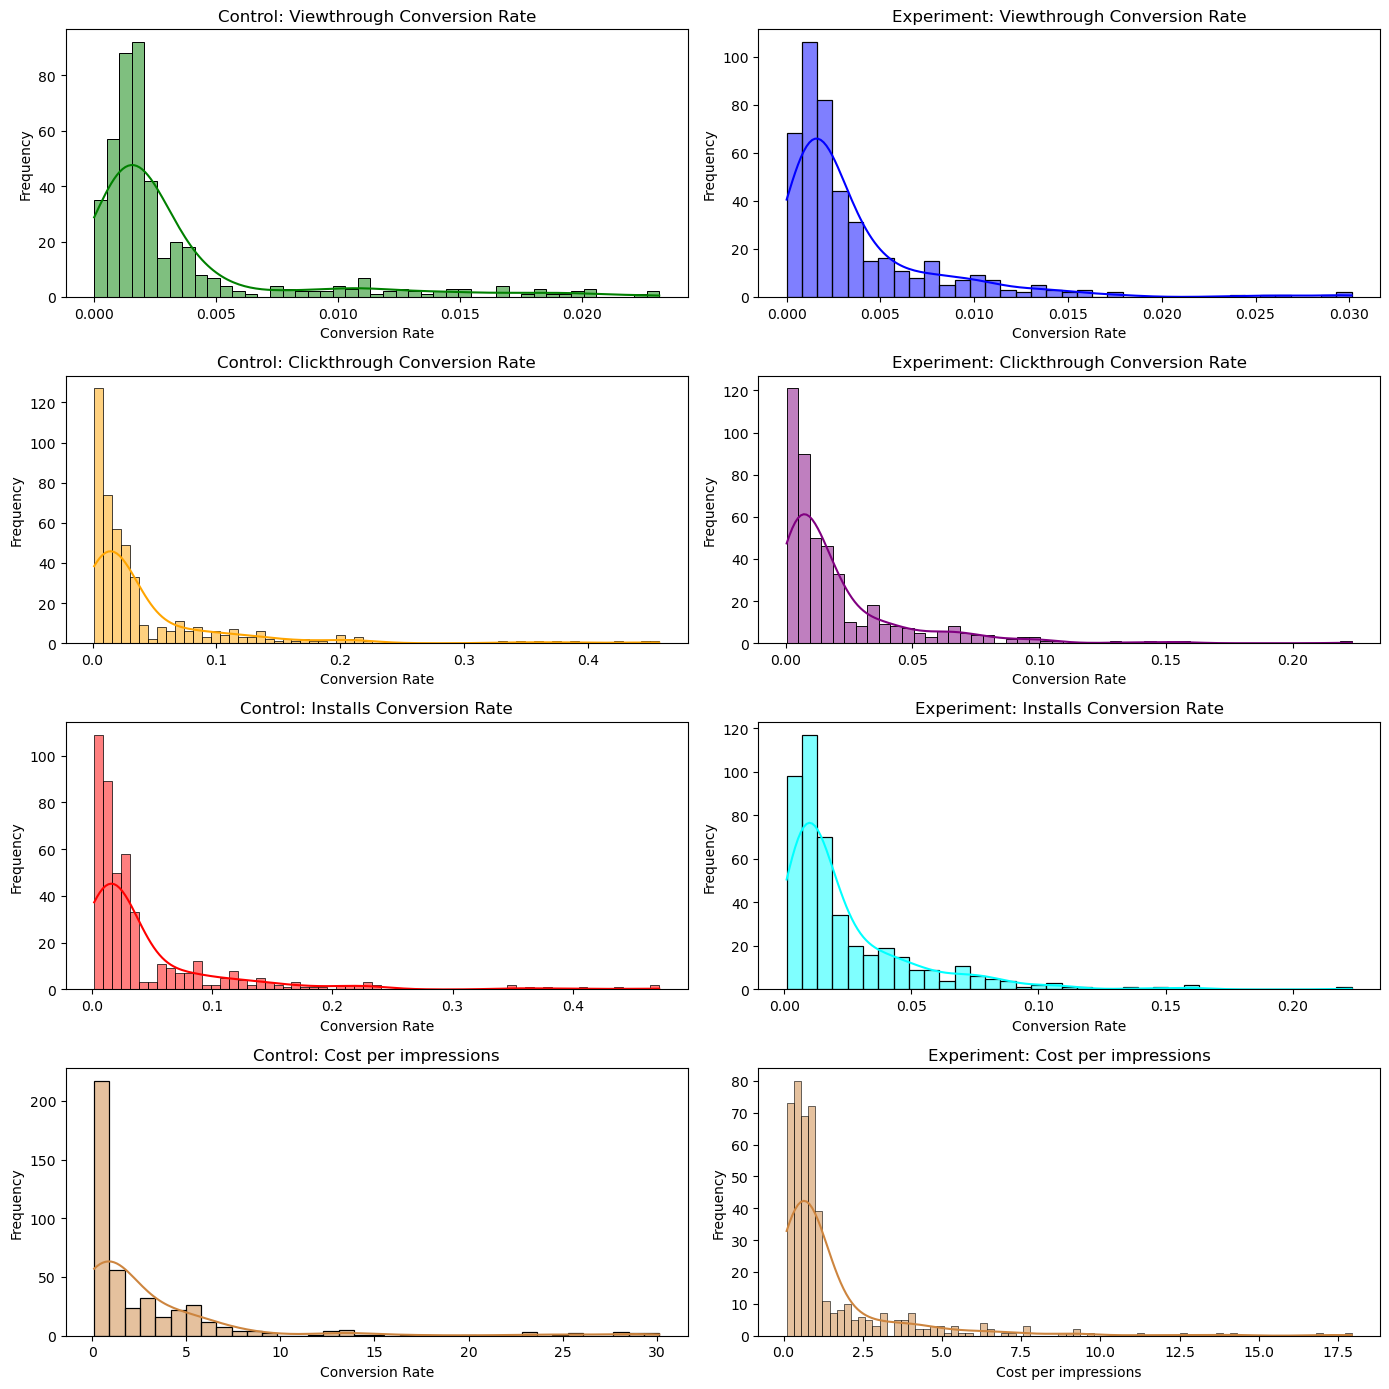

In [16]:
# Control and experiment groups
control_data = sorted_customer_daily[sorted_customer_daily['ab test group name'] == 'control']
experiment_data = sorted_customer_daily[sorted_customer_daily['ab test group name'] == 'experiment']

# Plotting histograms
# Setup figure
plt.figure(figsize=(14, 14))

# Viewthrough Conversion Rate
plt.subplot(4, 2, 1)
sns.histplot(control_data['viewthrough_conversion_rate'], kde=True, color='green')
plt.title('Control: Viewthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4, 2, 2)
sns.histplot(experiment_data['viewthrough_conversion_rate'], kde=True, color='blue')
plt.title('Experiment: Viewthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

# Clickthrough Conversion Rate
plt.subplot(4, 2, 3)
sns.histplot(control_data['clickthrough_conversion_rate'], kde=True, color='orange')
plt.title('Control: Clickthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4, 2, 4)
sns.histplot(experiment_data['clickthrough_conversion_rate'], kde=True, color='purple')
plt.title('Experiment: Clickthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

# Installs Conversion Rate
plt.subplot(4, 2, 5)
sns.histplot(control_data['installs_conversion_rate'], kde=True, color='red')
plt.title('Control: Installs Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4, 2, 6)
sns.histplot(experiment_data['installs_conversion_rate'], kde=True, color='cyan')
plt.title('Experiment: Installs Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

# # Cost per impressions
plt.subplot(4,2,7)
sns.histplot(control_data['cost_per_impressions'], kde=True, color='peru')
plt.title('Control: Cost per impressions')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4,2,8)
sns.histplot(experiment_data['cost_per_impressions'], kde=True, color='peru')
plt.title('Experiment: Cost per impressions')
plt.xlabel('Cost per impressions')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


1. Viewthrough Conversion Rate
Control Group (Green): The distribution is tightly clustered around lower conversion rates, suggesting that viewthrough conversions are generally low in the control group.
Experiment Group (Blue): The distribution extends to slightly higher conversion rates compared to the control group. This might indicate that the experimental modifications helped in improving the effectiveness of viewthrough ads in encouraging installs.


2. Clickthrough Conversion Rate
Control Group (Orange): Shows a somewhat spread out distribution with a focus on lower conversion rates. There are some outliers or data points extending towards higher conversion rates, suggesting occasional success in clickthrough rates.
Experiment Group (Purple): The histogram is more concentrated around lower conversion rates but with fewer higher outliers compared to the control. This might suggest more consistent performance but less frequent high peaks in clickthrough conversions in the experiment group.


3. Installs Conversion Rate
Control Group (Red): The distribution is broader, indicating variability in the overall install conversion rates. This suggests that the control group experiences a mix of low and occasionally high overall install conversion rates.
Experiment Group (Cyan): This group shows a tighter distribution mainly around the lower end of conversion rates, indicating more consistency but generally low install rates. However, there are fewer extreme values, pointing to the potential stability brought by experimental changes.
General Observations


The experiment group tends to show slightly better performance in viewthrough conversion rates, suggesting that the experimental changes might have positively impacted the effectiveness of non-click ad engagements.
Both clickthrough and installs conversion rate groups show variability. However, the control group occasionally hits higher conversion peaks, which could be attributed to content that resonated well with users during those times.

Consistency in the experiment group across all conversion types suggests that while the experimental changes might not have drastically increased peak performance, they could be offering more stable and predictable results.

# Let's test for whether the data we have follows a normal distribution

**Null Hypothesis (H0): The distribution is normally distributed**

**Alternative Hypothesis (HA): The distribution is not normally distributed**

In [17]:
from scipy.stats import shapiro
import pandas as pd

# Create function for sample size that does not exceed the number of available data points
def sample_data(df, column_name, size=450):
    return df[column_name].sample(min(size, len(df)), random_state=1)

# Shapiro-Wilk Test for checking normality
def perform_shapiro_test(samples):
    return shapiro(samples)

# Metrics to be tested
metrics = {
    'viewthrough_conversion_rate': 'VT',
    'clickthrough_conversion_rate': 'CT',
    'installs_conversion_rate': 'IT',
    'cost_per_impressions': 'Spend'
}

# Collect results in a dictionary
results = {}

# Perform Shapiro-Wilk test
for metric, abbreviation in metrics.items():
    sample_control = sample_data(control_data, metric)
    sample_experiment = sample_data(experiment_data, metric, 450 if metric != 'cost_per_impressions' else 4500)
    results[f'{abbreviation}: control'] = perform_shapiro_test(sample_control)
    results[f'{abbreviation}: experiment'] = perform_shapiro_test(sample_experiment)

for key, result in results.items():
    print(f'{key} = {result}')


VT: control = ShapiroResult(statistic=0.6341791152954102, pvalue=7.607665526205399e-30)
VT: experiment = ShapiroResult(statistic=0.6852803826332092, pvalue=4.280243041857066e-28)
CT: control = ShapiroResult(statistic=0.5843878984451294, pvalue=2.254768846656887e-31)
CT: experiment = ShapiroResult(statistic=0.6835324168205261, pvalue=3.698556587424977e-28)
IT: control = ShapiroResult(statistic=0.5911941528320312, pvalue=3.5736008627286126e-31)
IT: experiment = ShapiroResult(statistic=0.7141808867454529, pvalue=5.2797813273981006e-27)
Spend: control = ShapiroResult(statistic=0.5659900903701782, pvalue=6.687403818748905e-32)
Spend: experiment = ShapiroResult(statistic=0.5690507888793945, pvalue=8.162417068896589e-32)


1. Viewthrough (VT)
Control: Statistic = 0.634, p-value ≈ 0.0
Experiment: Statistic = 0.685, p-value ≈ 0.0
Interpretation: Both control and experiment groups show statistics significantly less than 1, and extremely small p-values suggest that the viewthrough conversion rates for both groups are not normally distributed.

2. Clickthrough (CT)
Control: Statistic = 0.584, p-value ≈ 0.0
Experiment: Statistic = 0.683, p-value ≈ 0.0
Interpretation: Similar to VT, both groups for CT also significantly deviate from a normal distribution. The control group appears to deviate more (lower statistic value) compared to the experiment group.

3. Installs (IT)
Control: Statistic = 0.591, p-value ≈ 0.0
Experiment: Statistic = 0.714, p-value ≈ 0.0
Interpretation: The installs conversion rates for both groups also do not follow a normal distribution. The experiment group's installs rates are closer to normal compared to the control, but still significantly non-normal.

4. Spend
Control: statistic = 0.56599, p-value ≈ 0.0
Experiment: statistic = 0.56905, p-value ≈ 0.0
Interpretation: Both the control and experiment groups show a significant departure from normal distribution, with very low p-values.

5. Non-parametric Tests: 
Given the non-normality, using non-parametric statistical tests (like the Wilcoxon signed-rank test for paired samples) might be more appropriate for comparing the control and experiment groups.

# A/B Test - View-through, Click-through, total installs & Spend
# Calculate Confidence Interval - View-through, Click-through, total installs & Spend

**Viewthrough:**

Null Hypothesis (Ho): The view-through conversion rate in the experiment group is equal to the control group.

Alternative Hypothesis (Ha): The view-through conversion rate in the experiment group is greater than the control group.

**Clickthrough:**

Null Hypothesis (H0): The click-through conversion rate is equal in the experiment group compared to the control group. 

Alternative Hypothesis (Ha): The click-through conversion rate is lower in the experiment group compared to the control group.

**Total Installs:**

Null Hypothesis (H0): The total conversion rate is equal in the experiment group compared to the control group. 

Alternative Hypothesis (Ha): Total conversion rate is lower in the experiment group compared to the control group.

**Clickthrough:**

Null Hypothesis (Ho): The cost per impressions in the experiment group is equal to the control group.

Alternative Hypothesis (Ha): The cost per impressions in the experiment group is lower than the control group.

In [18]:
# Create function to calculate mean, standard error, and confidence interval
def calculate_stats(data):
    mean = np.mean(data)
    std_error = stats.sem(data)
    confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_error)
    return mean, std_error, confidence_interval

# Calculate statistics for control and experiment groups
control_stats = {metric: calculate_stats(control_data[metric]) for metric in metrics}
experiment_stats = {metric: calculate_stats(experiment_data[metric]) for metric in metrics}


# Function to calculate difference in means, standard error of the difference, and confidence interval
def calculate_difference_stats(control, experiment):
    diff_mean = experiment[0] - control[0]
    diff_se = np.sqrt(control[1]**2 + experiment[1]**2)  # Combining standard errors
    diff_ci = stats.norm.interval(0.95, loc=diff_mean, scale=diff_se)  # 95% CI using normal distribution
    return diff_mean, diff_se, diff_ci

# Calculate stats difference between control & experiment groups
difference_stats = {metric: calculate_difference_stats(control_stats[metric], experiment_stats[metric]) for metric in metrics}

difference_stats

{'viewthrough_conversion_rate': (0.0002894059404121149,
  0.00029644716747945574,
  (-0.0002916198311665319, 0.0008704317119907617)),
 'clickthrough_conversion_rate': (-0.021000250665207526,
  0.0033164211604572026,
  (-0.027500316697270176, -0.014500184633144876)),
 'installs_conversion_rate': (-0.02071084472479541,
  0.0034645044460553855,
  (-0.027501148663342856, -0.013920540786247965)),
 'cost_per_impressions': (-1.5848322543517077,
  0.26350806479852795,
  (-2.1012985709926695, -1.068365937710746))}

Differences and Confidence Intervals:

Viewthrough Conversion Rate
Difference in Mean: 0.00029
95% Confidence Interval: (-0.00029, 0.00087)
This interval includes zero, suggesting no statistically significant difference in viewthrough conversion rate between the two groups.

Clickthrough Conversion Rate
Difference in Mean: -0.0210
95% Confidence Interval: (-0.0275, -0.0145)
This interval does not include zero, indicating a statistically significant decrease in clickthrough conversion rate in the experiment group compared to the control.

Installs Conversion Rate
Difference in Mean: -0.0207
95% Confidence Interval: (-0.0275, -0.0139)
This interval does not include zero, suggesting a statistically significant decrease in installs conversion rate in the experiment group compared to the control.

Cost per Impression
Difference in Mean: -1.5848
95% Confidence Interval: (-2.1013, -1.0684)
This interval does not include zero, indicating a statistically significant decrease in cost per impression in the experiment group compared to the control.
These findings can help guide decisions on whether the experimental changes should be implemented or revised based on their impact compared to the control condition.

# Wilconxon Test

In [19]:
from scipy.stats import wilcoxon

# Merge the control and experiment data based on 'Day of date' and 'customer' for pairing
paired_data = pd.merge(control_data, experiment_data, on=['Day of date', 'customer'])

# Perform Wilcoxon Signed-Rank Test for conversions and cost/impression
stat_viewthrough, p_value_viewthrough = wilcoxon(paired_data['viewthrough_conversion_rate_x'], paired_data['viewthrough_conversion_rate_y'], alternative='less')
stat_clickthrough, p_value_clickthrough = wilcoxon(paired_data['clickthrough_conversion_rate_x'], paired_data['clickthrough_conversion_rate_y'], alternative='greater')
stat_installs, p_value_installs = wilcoxon(paired_data['installs_conversion_rate_x'], paired_data['installs_conversion_rate_y'], alternative='greater')
stat_spend, p_value_spend = wilcoxon(paired_data['cost_per_impressions_x'], paired_data['cost_per_impressions_y'], alternative='greater')

# print conversion & cost/impression values
print(stat_viewthrough, p_value_viewthrough)
print(stat_clickthrough, p_value_clickthrough)
print(stat_installs, p_value_installs)
print(stat_spend, p_value_spend)

# print sample size
sample_size = len(paired_data)
print("Sample size for the Wilcoxon Signed-Rank Test:", sample_size)

40592.0 0.00034225999955585424
81506.0 3.706252625318966e-29
76627.0 3.319293481396156e-21
79071.0 5.078507602870048e-25
Sample size for the Wilcoxon Signed-Rank Test: 450


1. Viewthrough Conversion Rate Test Statistic: 40592
2. P-value: 0.00034225999955585424 

The very low p-value suggests that there is significant evidence to reject the null hypothesis. This implies that the viewthrough conversion rate in the experiment group is statistically significantly greater than in the control group.

1. Clickthrough Conversion Rate Test Statistic: 81506
2. P-value: 3.706252625318966e-29 

The extremely low p-value indicates strong evidence against the null hypothesis, supporting the alternative hypothesis that the clickthrough conversion rate in the control group is significantly greater than in the experiment group.

1. Installs Conversion Rate Test Statistic: 76627
2. P-value: 3.319293481396156e-21 

Similar to clickthrough rates, this very low p-value provides substantial evidence against the null hypothesis, indicating that the installs conversion rate in the control group is significantly greater than in the experiment group.

1. Spend per 1000 Impressions Test Statistic: 79071
2. P-value: 5.078507602870048e-25 

The very low p-value suggests that there is significant evidence to reject the null hypothesis. This implies that the spend per 1000 impressions is significantly greater in the control group compared to the experiment group.

These outcomes provides valuable insights into the effects of whatever changes were implemented in the experiment group and can guide further decision-making on whether to adopt, modify, or abandon the experimental conditions.

# Viewthrough Conversion rate Lift

In [22]:
data = pd.read_csv('take_home_assignment_data_table_1.csv')

# Convert 'Day of date' to datetime
data['Day of date'] = pd.to_datetime(data['Day of date'], format='%d-%b-%y')

# Filter for control and experiment groups
control_data.loc[:, 'viewthrough conversion rate'] = control_data['viewthrough install'] / control_data['impressions'] * 100
experiment_data.loc[:, 'viewthrough conversion rate'] = experiment_data['viewthrough install'] / experiment_data['impressions'] * 100

# Calculate mean VTCR for both groups
mean_vtcr_control = control_data['viewthrough conversion rate'].mean()
mean_vtcr_experiment = experiment_data['viewthrough conversion rate'].mean()

# Calculate VTCR lift
lift_vtcr = ((mean_vtcr_experiment - mean_vtcr_control) / mean_vtcr_control) * 100

mean_vtcr_control, mean_vtcr_experiment, lift_vtcr

(0.0034273320332711826, 0.003716737973683298, 8.444059040754647)

# Clickthrough conversion rate lift

In [23]:
data = pd.read_csv('take_home_assignment_data_table_1.csv')

# Convert 'Day of date' to datetime
data['Day of date'] = pd.to_datetime(data['Day of date'], format='%d-%b-%y')

# Recalculate
control_data = data[data['ab test group name'] == 'control'][['Day of date', 'customer', 'clickthrough install', 'impressions']]
experiment_data = data[data['ab test group name'] == 'experiment'][['Day of date', 'customer', 'clickthrough install', 'impressions']]

# Re-merge the datasets on date and customer to pair the data correctly
paired_cost_data = pd.merge(
    control_data,
    experiment_data,
    on=['Day of date', 'customer'],
    suffixes=('_control', '_experiment')
)

# Calculate the CT conversion rate for control and experiment
paired_cost_data['ct_conversion_rate_control'] = (paired_cost_data['clickthrough install_control'] / paired_cost_data['impressions_control']) * 100
paired_cost_data['ct_conversion_rate_experiment'] = (paired_cost_data['clickthrough install_experiment'] / paired_cost_data['impressions_experiment']) * 100

# Calculate the difference in CT conversion rate(experiment - control)
paired_cost_data['ct_conversion_rate_difference'] = paired_cost_data['ct_conversion_rate_experiment'] - paired_cost_data['ct_conversion_rate_control']

# Calculate the lift for each pair in the CT conversion rate
paired_cost_data['ct_conversion_rate_lift'] = (paired_cost_data['ct_conversion_rate_difference'] / paired_cost_data['ct_conversion_rate_control']) * 100

# Calculate the average lift
average_cpi_lift = paired_cost_data['ct_conversion_rate_lift'].mean()
average_cpi_lift


-20.010531910516615

# Total conversion rate lift

In [27]:
data = pd.read_csv('take_home_assignment_data_table_1.csv')

# Convert 'Day of date' to datetime
data['Day of date'] = pd.to_datetime(data['Day of date'], format='%d-%b-%y')

# Recalculate
control_data = data[data['ab test group name'] == 'control'][['Day of date', 'customer', 'installs', 'impressions']]
experiment_data = data[data['ab test group name'] == 'experiment'][['Day of date', 'customer', 'installs', 'impressions']]

# Pair the data correctly
paired_cost_data = pd.merge(
    control_data,
    experiment_data,
    on=['Day of date', 'customer'],
    suffixes=('_control', '_experiment')
)

# Calculate the total conversion rate for control and experiment
paired_cost_data['total_conversion_rate_control'] = (paired_cost_data['installs_control'] / paired_cost_data['impressions_control']) * 100
paired_cost_data['total_conversion_rate_experiment'] = (paired_cost_data['installs_experiment'] / paired_cost_data['impressions_experiment']) * 100

# Calculate the difference in total conversion rate (experiment - control)
paired_cost_data['total_conversion_rate_difference'] = paired_cost_data['total_conversion_rate_experiment'] - paired_cost_data['total_conversion_rate_control']

# Calculate the lift for each pair in the total conversion rate
paired_cost_data['total_conversion_rate_lift'] = (paired_cost_data['total_conversion_rate_difference'] / paired_cost_data['total_conversion_rate_control']) * 100

# Calculate conversion rate lift
average_cpi_lift = paired_cost_data['total_conversion_rate_lift'].mean()
average_cpi_lift

-10.79309560907425

# Spend Lift

In [28]:
data = pd.read_csv('take_home_assignment_data_table_1.csv')

# Convert 'Day of date' to datetime
data['Day of date'] = pd.to_datetime(data['Day of date'], format='%d-%b-%y')

# Recalculate
control_data = data[data['ab test group name'] == 'control'][['Day of date', 'customer', 'spend', 'impressions']]
experiment_data = data[data['ab test group name'] == 'experiment'][['Day of date', 'customer', 'spend', 'impressions']]

# Pair the data correctly
paired_cost_data = pd.merge(
    control_data,
    experiment_data,
    on=['Day of date', 'customer'],
    suffixes=('_control', '_experiment')
)

# Calculate the cost per impression for control and experiment
paired_cost_data['cost_per_impression_control'] = (paired_cost_data['spend_control'] / paired_cost_data['impressions_control']) * 1000
paired_cost_data['cost_per_impression_experiment'] = (paired_cost_data['spend_experiment'] / paired_cost_data['impressions_experiment']) * 1000

# Calculate the difference in cost per impression (experiment - control)
paired_cost_data['cpi_difference'] = paired_cost_data['cost_per_impression_experiment'] - paired_cost_data['cost_per_impression_control']

# Calculate the lift for each pair in the cost per impression
paired_cost_data['cpi_lift'] = (paired_cost_data['cpi_difference'] / paired_cost_data['cost_per_impression_control']) * 100

# Calculate the average lift
average_cpi_lift = paired_cost_data['cpi_lift'].mean()
average_cpi_lift



-18.22757343121602

# Do customers who are sensitive to VT behave differently from rest of customer population?

Filter for customers who are sensitive True and repeat the same experiment procedure

# First analyze the graph comparing this behavior

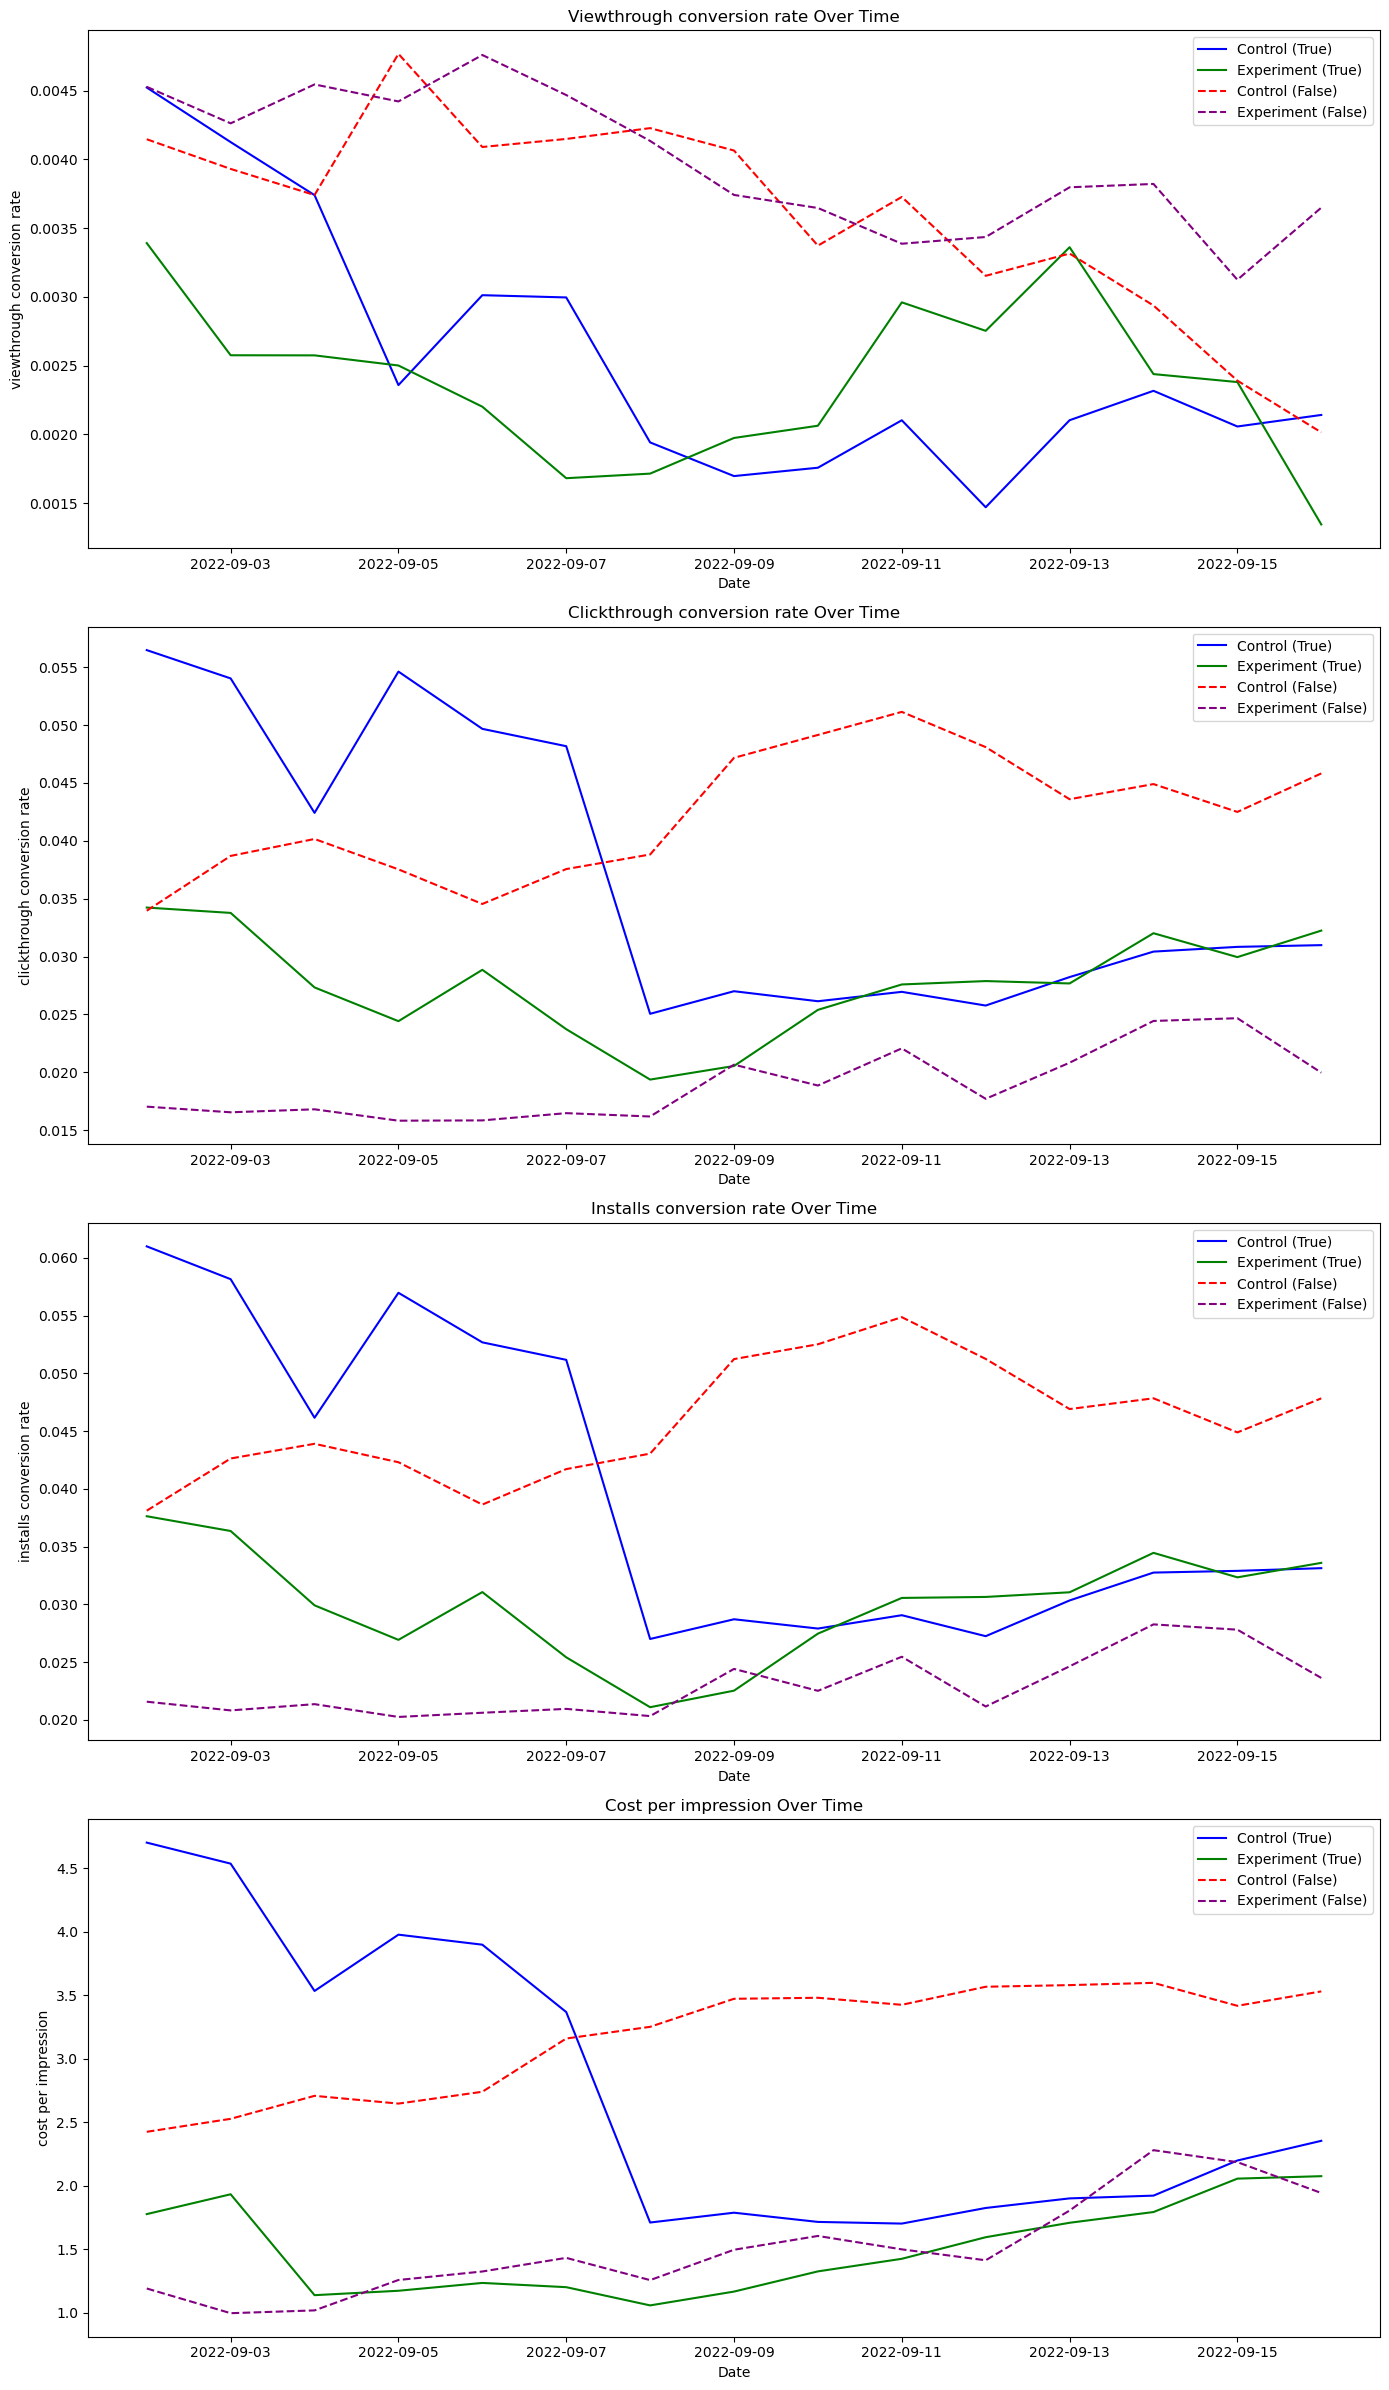

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('take_home_assignment_data_table_1.csv')
data['Day of date'] = pd.to_datetime(data['Day of date'], format='%d-%b-%y')
data_sorted = data.sort_values('Day of date')

# Filter data for True and False sensitive to VT
data_true = data[data['customer sensitive to VT'] == True]
data_false = data[data['customer sensitive to VT'] == False]

# Update conversion metrics to include cost per impression
conversion_metrics_updated = ['viewthrough conversion rate', 'clickthrough conversion rate', 'installs conversion rate', 'cost per impression']

# Define colors and styles for clarity
colors = {'control': 'blue', 'experiment': 'green'}
linestyles = {'True': '-', 'False': '--'}

# Correct the handling of color palette
new_colors = ['blue', 'green', 'red', 'purple']  # List of colors for each line

# Recreate figure and axes for the sorted data
fig, axes = plt.subplots(4, 1, figsize=(14, 24))

# Plot each metric with sorted dates and handle empty data cases
for i, metric in enumerate(conversion_metrics_updated):
    plot_data = False  # Track if any data was plotted for this metric
    idx = 0  # Reset color index for each metric
    for sensitivity, linestyle in linestyles.items():
        for group in colors:
            filtered_data = data_sorted[(data_sorted['customer sensitive to VT'] == (sensitivity == 'True')) & (data_sorted['ab test group name'] == group)]
            if not filtered_data.empty:
                summary = filtered_data.groupby('Day of date')[metric].mean()
                if not summary.empty:
                    axes[i].plot(summary.index, summary.values, label=f'{group.capitalize()} ({sensitivity})', color=new_colors[idx], linestyle=linestyle)
                    plot_data = True  # Data was plotted
            idx += 1

    if plot_data:
        axes[i].set_title(f'{metric.capitalize()} Over Time')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel(metric)
        axes[i].legend()
    else:
        axes[i].text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()

# Additional Analysis
# This could be useful for future studies but did not include in Powerpoint & Written Report

# Filter out your data customer sensitive to VT is = TRUE

In [48]:
data = pd.read_csv('take_home_assignment_data_table_1.csv')

# Convert 'Day of date' to datetime
data['Day of date'] = pd.to_datetime(data['Day of date'], format='%d-%b-%y')

# # Sort the data by 'Day of date'
sorted_data = data.sort_values(by='Day of date')

In [49]:
# Filter out data for customers who are sensitive to view-through installs
filtered_data = sorted_data[sorted_data['customer sensitive to VT'] == True]

filtered_data

,Day of date,customer,ab test group name,customer sensitive to VT,impressions,installs,spend,clickthrough install,viewthrough install,viewthrough conversion rate,clickthrough conversion rate,installs conversion rate,cost per impression
36,2022-09-02,customer_19,control,True,1744153,70,355,70,0,0.000000,0.004013,0.004013,0.203537
37,2022-09-02,customer_19,experiment,True,3423129,72,357,58,14,0.000409,0.001694,0.002103,0.104291
38,2022-09-02,customer_20,control,True,1924401,483,8342,468,15,0.000779,0.024319,0.025099,4.334855
39,2022-09-02,customer_20,experiment,True,3457276,495,8398,478,17,0.000492,0.013826,0.014318,2.429080
45,2022-09-02,customer_23,experiment,True,244411,116,1019,101,15,0.006137,0.041324,0.047461,4.169207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2022-09-16,customer_23,control,True,299047,42,528,32,10,0.003344,0.010701,0.014045,1.765609
846,2022-09-16,customer_4,control,True,6799735,5127,6357,4965,162,0.002382,0.073018,0.075400,0.934889
847,2022-09-16,customer_4,experiment,True,5518972,5361,6392,5181,180,0.003261,0.093876,0.097138,1.158187
848,2022-09-16,customer_5,control,True,25660973,1503,17211,1123,380,0.001481,0.004376,0.005857,0.670707


# Relooking at distribution VT is = TRUE

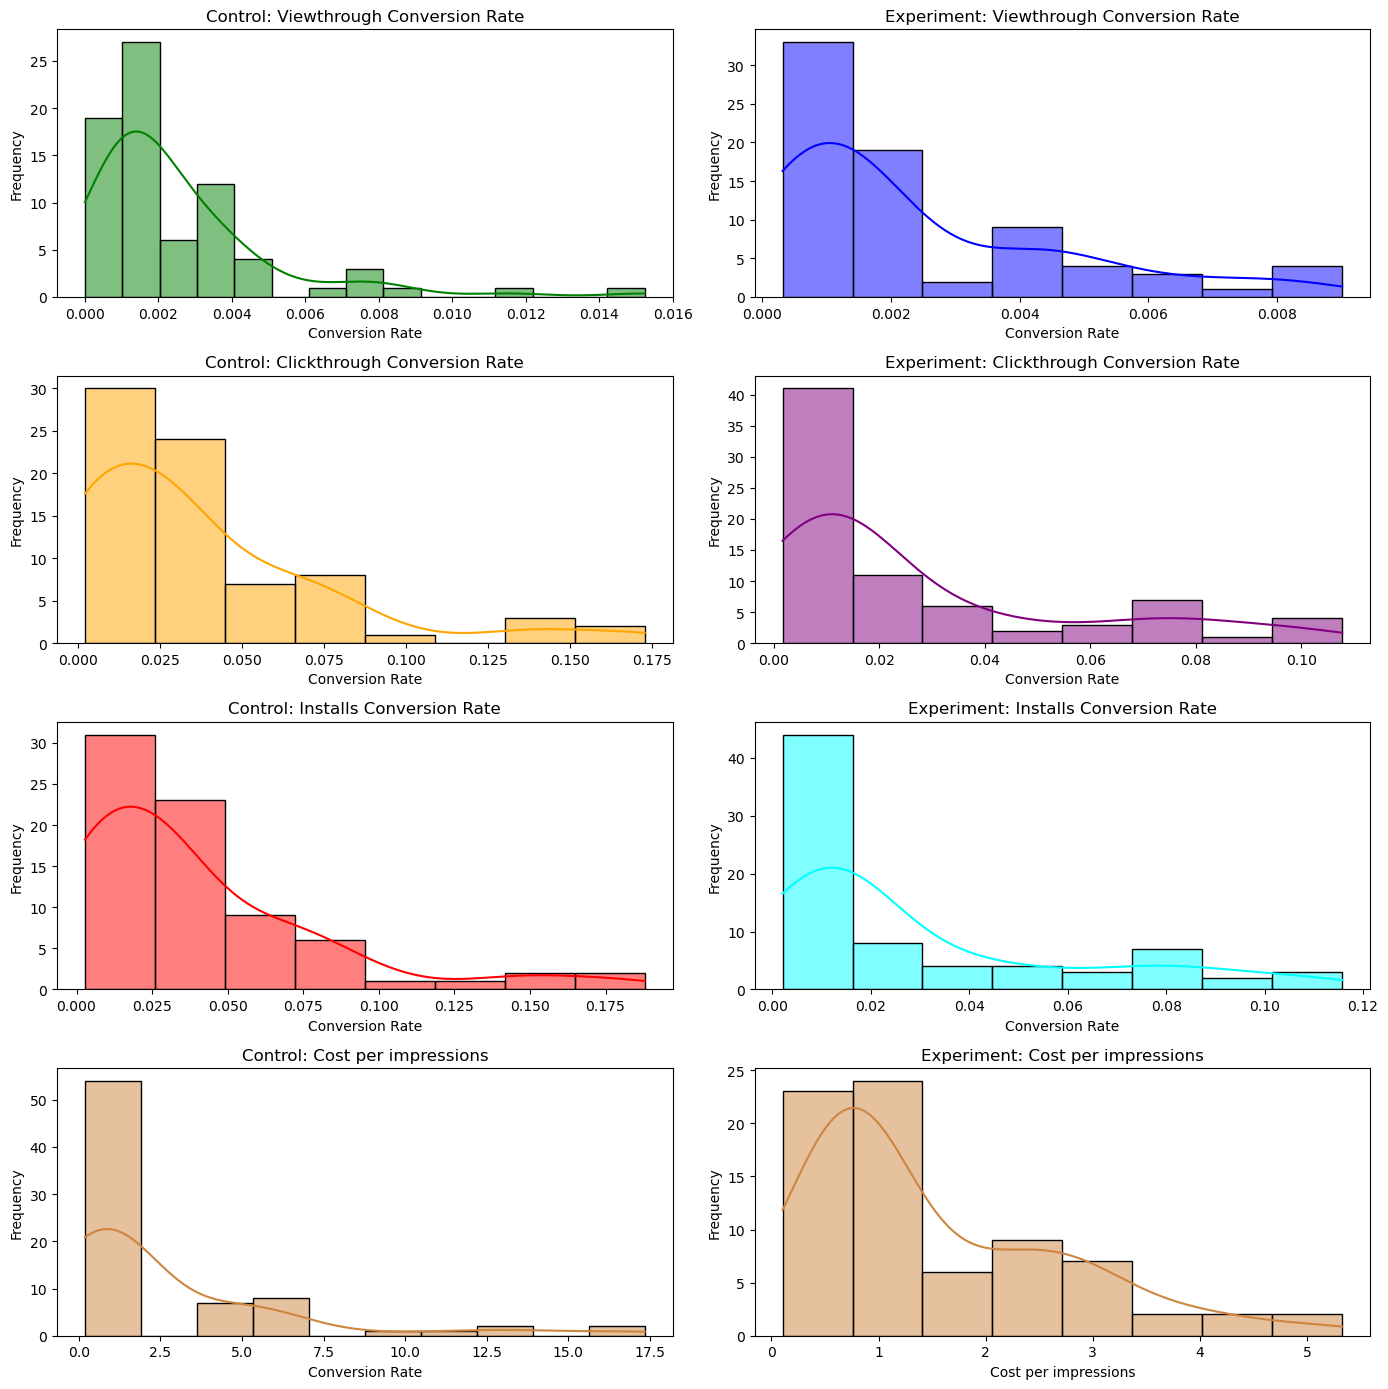

In [50]:
# Re-defining the control and experiment groups
control_data = filtered_data[filtered_data['ab test group name'] == 'control']
experiment_data = filtered_data[filtered_data['ab test group name'] == 'experiment']

# Plotting histograms for all conversion rates, separated by control and experiment groups

# Setup figure
plt.figure(figsize=(14, 14))

# Viewthrough Conversion Rate
plt.subplot(4, 2, 1)
sns.histplot(control_data['viewthrough conversion rate'], kde=True, color='green')
plt.title('Control: Viewthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4, 2, 2)
sns.histplot(experiment_data['viewthrough conversion rate'], kde=True, color='blue')
plt.title('Experiment: Viewthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

# Clickthrough Conversion Rate
plt.subplot(4, 2, 3)
sns.histplot(control_data['clickthrough conversion rate'], kde=True, color='orange')
plt.title('Control: Clickthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4, 2, 4)
sns.histplot(experiment_data['clickthrough conversion rate'], kde=True, color='purple')
plt.title('Experiment: Clickthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

# Installs Conversion Rate
plt.subplot(4, 2, 5)
sns.histplot(control_data['installs conversion rate'], kde=True, color='red')
plt.title('Control: Installs Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4, 2, 6)
sns.histplot(experiment_data['installs conversion rate'], kde=True, color='cyan')
plt.title('Experiment: Installs Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

# # Cost per impressions
plt.subplot(4,2,7)
sns.histplot(control_data['cost per impression'], kde=True, color='peru')
plt.title('Control: Cost per impressions')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4,2,8)
sns.histplot(experiment_data['cost per impression'], kde=True, color='peru')
plt.title('Experiment: Cost per impressions')
plt.xlabel('Cost per impressions')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Apply Shapiro VT is = TRUE

In [51]:
from scipy.stats import shapiro
import pandas as pd

# Sample data for each metric, ensuring the sample size does not exceed the number of available data points
def sample_data(df, column_name, size=150):
    return df[column_name].sample(min(size, len(df)), random_state=1)

# Shapiro-Wilk Test for checking normality
def perform_shapiro_test(samples):
    return shapiro(samples)

# Metrics to be tested
metrics = {
    'viewthrough conversion rate': 'VT',
    'clickthrough conversion rate': 'CT',
    'installs conversion rate': 'IT',
    'cost per impression': 'Spend'
}

# Collect results in a dictionary
results = {}

# Perform sampling and Shapiro-Wilk test
for metric, abbreviation in metrics.items():
    sample_control = sample_data(control_data, metric)
    sample_experiment = sample_data(experiment_data, metric, 150 if metric != 'cost per impression' else 1500)
    results[f'{abbreviation}: control'] = perform_shapiro_test(sample_control)
    results[f'{abbreviation}: experiment'] = perform_shapiro_test(sample_experiment)

# Print results
for key, result in results.items():
    print(f'{key} = {result}')

VT: control = ShapiroResult(statistic=0.7216348648071289, pvalue=1.2655820835760778e-10)
VT: experiment = ShapiroResult(statistic=0.8169611096382141, pvalue=3.154429961682581e-08)
CT: control = ShapiroResult(statistic=0.7891597747802734, pvalue=5.372788436375231e-09)
CT: experiment = ShapiroResult(statistic=0.7664986848831177, pvalue=1.4130682179924747e-09)
IT: control = ShapiroResult(statistic=0.7865399122238159, pvalue=4.583014856507361e-09)
IT: experiment = ShapiroResult(statistic=0.7663813233375549, pvalue=1.4036353190860495e-09)
Spend: control = ShapiroResult(statistic=0.6475851535797119, pvalue=3.959088265559352e-12)
Spend: experiment = ShapiroResult(statistic=0.8634399771690369, pvalue=9.197613053402165e-07)


# Conduct Confidence Intervals VT is = TRUE

In [52]:
# Define a function to calculate mean, standard error, and confidence interval
def calculate_stats(data):
    mean = np.mean(data)
    std_error = stats.sem(data)
    confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_error)
    return mean, std_error, confidence_interval

# Calculate statistics for control and experiment groups without filtering
control_stats = {metric: calculate_stats(control_data[metric]) for metric in metrics}
experiment_stats = {metric: calculate_stats(experiment_data[metric]) for metric in metrics}


# Function to calculate difference in means, standard error of the difference, and confidence interval
def calculate_difference_stats(control, experiment):
    diff_mean = experiment[0] - control[0]
    diff_se = np.sqrt(control[1]**2 + experiment[1]**2)  # Combining standard errors
    diff_ci = stats.norm.interval(0.95, loc=diff_mean, scale=diff_se)  # 95% CI using normal distribution
    return diff_mean, diff_se, diff_ci

# Calculate statistics for the difference between control and experiment groups
difference_stats = {metric: calculate_difference_stats(control_stats[metric], experiment_stats[metric]) for metric in metrics}

difference_stats

{'viewthrough conversion rate': (-0.0001618551562126533,
  0.0003967121961384437,
  (-0.0009393967728717929, 0.0006156864604464863)),
 'clickthrough conversion rate': (-0.009449941064312867,
  0.005669810696529135,
  (-0.02056256582866993, 0.0016626837000441944)),
 'installs conversion rate': (-0.009611796220525517,
  0.006002350589377405,
  (-0.021376187198288, 0.002152594757236965)),
 'cost per impression': (-1.2318821502933253,
  0.4605083606952968,
  (-2.1344619518356875, -0.32930234875096287))}

# Conduct A/B testing for Wilconxon VT is = TRUE

In [53]:
from scipy.stats import wilcoxon

# Merge the control and experiment data based on 'Day of date' and 'customer' for pairing
paired_data = pd.merge(control_data, experiment_data, on=['Day of date', 'customer'])

# Perform the Wilcoxon Signed-Rank Test
stat_viewthrough, p_value_viewthrough = wilcoxon(paired_data['viewthrough conversion rate_x'], paired_data['viewthrough conversion rate_y'], alternative='less')
stat_clickthrough, p_value_clickthrough = wilcoxon(paired_data['clickthrough conversion rate_x'], paired_data['clickthrough conversion rate_y'], alternative='greater')
stat_installs, p_value_installs = wilcoxon(paired_data['installs conversion rate_x'], paired_data['installs conversion rate_y'], alternative='greater')
stat_spend, p_value_spend = wilcoxon(paired_data['cost per impression_x'], paired_data['cost per impression_y'], alternative='greater')

print(stat_viewthrough, p_value_viewthrough)
print(stat_clickthrough, p_value_clickthrough)
print(stat_installs, p_value_installs)
print(stat_spend, p_value_spend)

sample_size = len(paired_data)
print("Sample size for the Wilcoxon Signed-Rank Test:", sample_size)

1266.0 0.20056395665653381
1649.0 0.11843534560624835
1621.0 0.15033699264465106
1761.0 0.03800949085553906
Sample size for the Wilcoxon Signed-Rank Test: 75


# Filter out your data customer sensitive to VT is = FALSE

In [42]:
data = pd.read_csv('take_home_assignment_data_table_1.csv')

# Convert 'Day of date' to datetime
data['Day of date'] = pd.to_datetime(data['Day of date'], format='%d-%b-%y')

# # Sort the data by 'Day of date'
sorted_data = data.sort_values(by='Day of date')

# Filter out data for customers who are sensitive to view-through installs
filtered_data = sorted_data[sorted_data['customer sensitive to VT'] == False]

filtered_data

,Day of date,customer,ab test group name,customer sensitive to VT,impressions,installs,spend,clickthrough install,viewthrough install,viewthrough conversion rate,clickthrough conversion rate,installs conversion rate,cost per impression
0,2022-09-02,customer_1,control,False,10874240,3819,41172,3634,185,0.001701,0.033418,0.035120,3.786196
32,2022-09-02,customer_17,control,False,1641799,1227,9606,1215,12,0.000731,0.074004,0.074735,5.850899
33,2022-09-02,customer_17,experiment,False,2478762,1209,9643,1193,16,0.000645,0.048129,0.048774,3.890248
34,2022-09-02,customer_18,control,False,1550405,275,1058,266,9,0.000580,0.017157,0.017737,0.682402
35,2022-09-02,customer_18,experiment,False,1492119,293,1070,280,13,0.000871,0.018765,0.019637,0.717101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,2022-09-16,customer_13,control,False,725465,32,389,28,4,0.000551,0.003860,0.004411,0.536208
865,2022-09-16,customer_13,experiment,False,352087,64,382,16,48,0.013633,0.004544,0.018177,1.084959
866,2022-09-16,customer_14,control,False,8789897,1430,12463,1292,138,0.001570,0.014699,0.016269,1.417878
868,2022-09-16,customer_15,control,False,10589442,909,10134,747,162,0.001530,0.007054,0.008584,0.956991


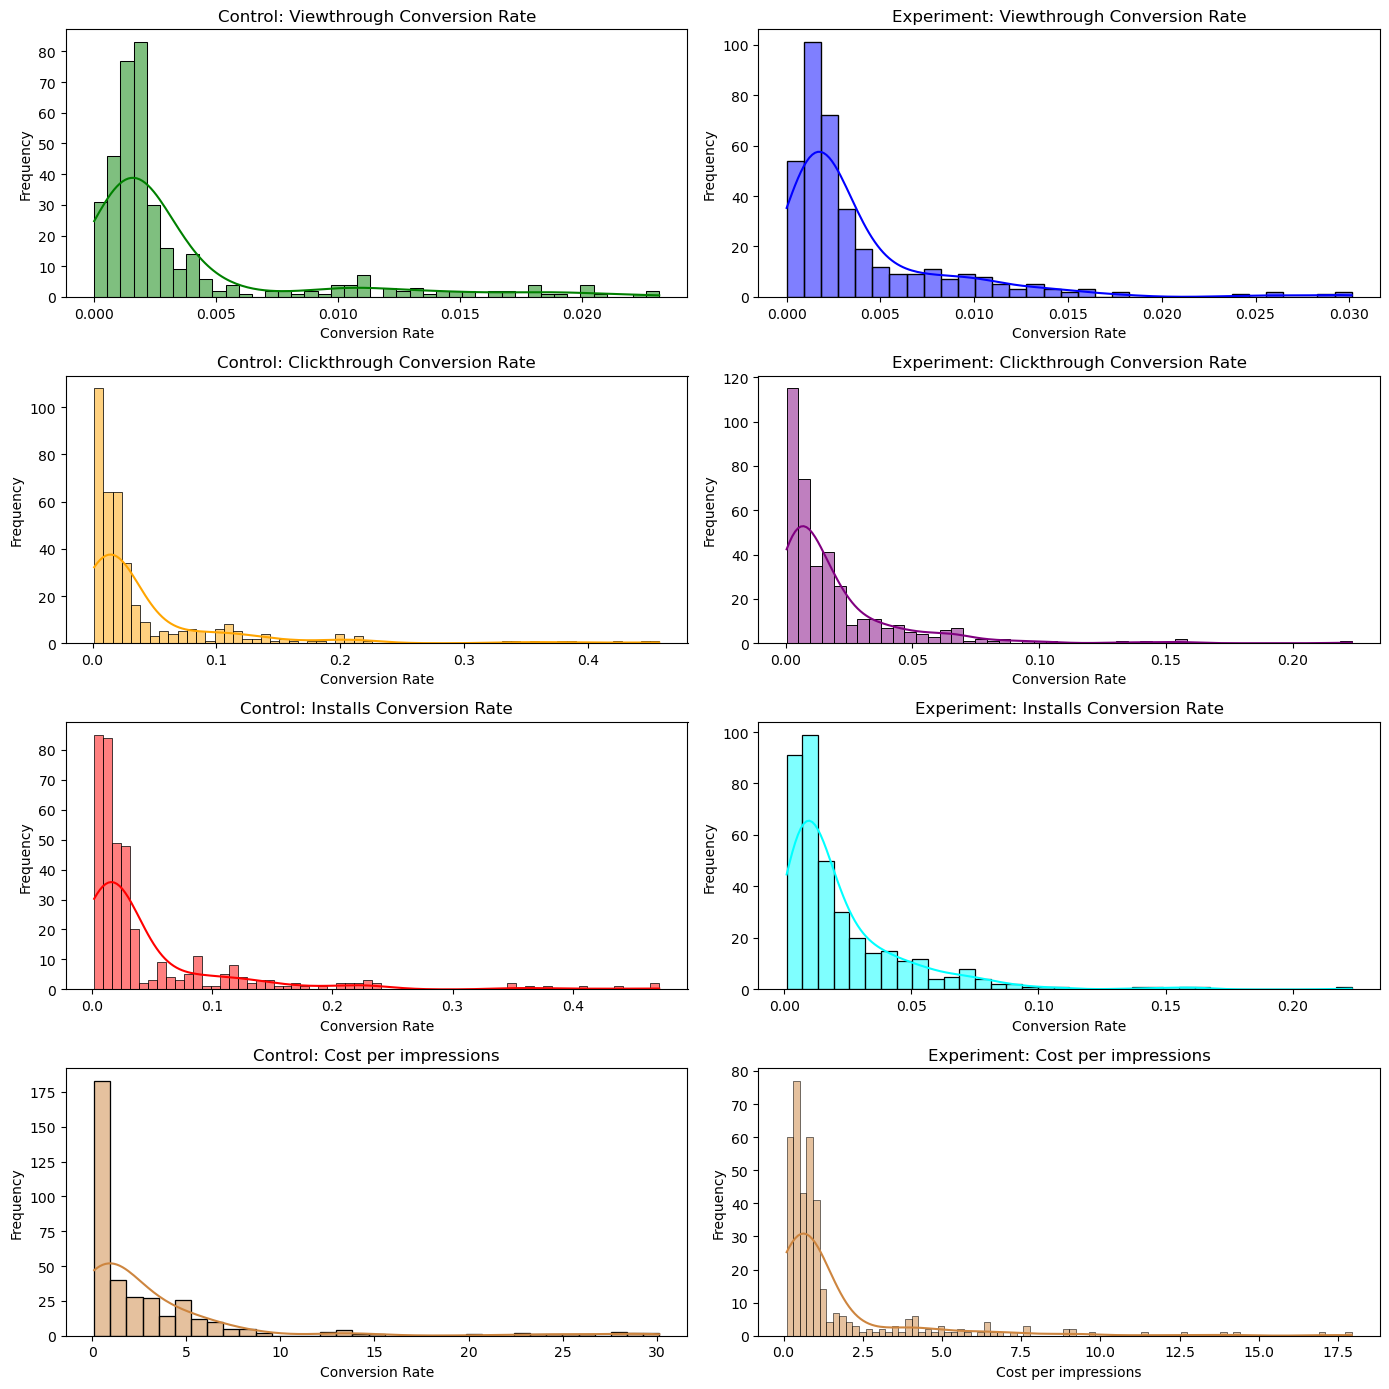

In [43]:
# Re-defining the control and experiment groups
control_data = filtered_data[filtered_data['ab test group name'] == 'control']
experiment_data = filtered_data[filtered_data['ab test group name'] == 'experiment']

# Plotting histograms for all conversion rates, separated by control and experiment groups

# Setup figure
plt.figure(figsize=(14, 14))

# Viewthrough Conversion Rate
plt.subplot(4, 2, 1)
sns.histplot(control_data['viewthrough conversion rate'], kde=True, color='green')
plt.title('Control: Viewthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4, 2, 2)
sns.histplot(experiment_data['viewthrough conversion rate'], kde=True, color='blue')
plt.title('Experiment: Viewthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

# Clickthrough Conversion Rate
plt.subplot(4, 2, 3)
sns.histplot(control_data['clickthrough conversion rate'], kde=True, color='orange')
plt.title('Control: Clickthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4, 2, 4)
sns.histplot(experiment_data['clickthrough conversion rate'], kde=True, color='purple')
plt.title('Experiment: Clickthrough Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

# Installs Conversion Rate
plt.subplot(4, 2, 5)
sns.histplot(control_data['installs conversion rate'], kde=True, color='red')
plt.title('Control: Installs Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4, 2, 6)
sns.histplot(experiment_data['installs conversion rate'], kde=True, color='cyan')
plt.title('Experiment: Installs Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

# # Cost per impressions
plt.subplot(4,2,7)
sns.histplot(control_data['cost per impression'], kde=True, color='peru')
plt.title('Control: Cost per impressions')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

plt.subplot(4,2,8)
sns.histplot(experiment_data['cost per impression'], kde=True, color='peru')
plt.title('Experiment: Cost per impressions')
plt.xlabel('Cost per impressions')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Apply Shaprio VT = FALSE

In [44]:
from scipy.stats import shapiro
import pandas as pd

# Sample data for each metric, ensuring the sample size does not exceed the number of available data points
def sample_data(df, column_name, size=375):
    return df[column_name].sample(min(size, len(df)), random_state=1)

# Shapiro-Wilk Test for checking normality
def perform_shapiro_test(samples):
    return shapiro(samples)

# Metrics to be tested
metrics = {
    'viewthrough conversion rate': 'VT',
    'clickthrough conversion rate': 'CT',
    'installs conversion rate': 'IT',
    'cost per impression': 'Spend'
}

# Collect results in a dictionary
results = {}

# Perform sampling and Shapiro-Wilk test
for metric, abbreviation in metrics.items():
    sample_control = sample_data(control_data, metric)
    sample_experiment = sample_data(experiment_data, metric, 375 if metric != 'cost per impression' else 3750)
    results[f'{abbreviation}: control'] = perform_shapiro_test(sample_control)
    results[f'{abbreviation}: experiment'] = perform_shapiro_test(sample_experiment)

# Print results
for key, result in results.items():
    print(f'{key} = {result}')

VT: control = ShapiroResult(statistic=0.6368359327316284, pvalue=1.9724850637469196e-27)
VT: experiment = ShapiroResult(statistic=0.6901935338973999, pvalue=1.110333187233603e-25)
CT: control = ShapiroResult(statistic=0.5688273310661316, pvalue=2.1645984053329936e-29)
CT: experiment = ShapiroResult(statistic=0.6517583727836609, pvalue=5.796288005091558e-27)
IT: control = ShapiroResult(statistic=0.5767856240272522, pvalue=3.560549442990981e-29)
IT: experiment = ShapiroResult(statistic=0.6920275688171387, pvalue=1.287279125617268e-25)
Spend: control = ShapiroResult(statistic=0.5550198554992676, pvalue=9.284590784376594e-30)
Spend: experiment = ShapiroResult(statistic=0.5467005372047424, pvalue=5.631292015919293e-30)


# Conduct Confidence Interval - VT = FALSE

In [45]:
# Define a function to calculate mean, standard error, and confidence interval
def calculate_stats(data):
    mean = np.mean(data)
    std_error = stats.sem(data)
    confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_error)
    return mean, std_error, confidence_interval

# Calculate statistics for control and experiment groups without filtering
control_stats = {metric: calculate_stats(control_data[metric]) for metric in metrics}
experiment_stats = {metric: calculate_stats(experiment_data[metric]) for metric in metrics}


# Function to calculate difference in means, standard error of the difference, and confidence interval
def calculate_difference_stats(control, experiment):
    diff_mean = experiment[0] - control[0]
    diff_se = np.sqrt(control[1]**2 + experiment[1]**2)  # Combining standard errors
    diff_ci = stats.norm.interval(0.95, loc=diff_mean, scale=diff_se)  # 95% CI using normal distribution
    return diff_mean, diff_se, diff_ci

# Calculate statistics for the difference between control and experiment groups
difference_stats = {metric: calculate_difference_stats(control_stats[metric], experiment_stats[metric]) for metric in metrics}

difference_stats

{'viewthrough conversion rate': (0.0003796581597370705,
  0.0003446250984133643,
  (-0.0002957946213216952, 0.0010551109407958364)),
 'clickthrough conversion rate': (-0.023310312585386454,
  0.003811466388441559,
  (-0.030780649435016863, -0.015839975735756046)),
 'installs conversion rate': (-0.022930654425649392,
  0.003978223839782593,
  (-0.030727829874061918, -0.015133478977236868)),
 'cost per impression': (-1.6554222751633854,
  0.3025889142385606,
  (-2.2484856491920433, -1.0623589011347274))}

# Apply A/B Test Wilconxon - VT = FALSE

In [47]:
from scipy.stats import wilcoxon

# Merge the control and experiment data based on 'Day of date' and 'customer' for pairing
paired_data = pd.merge(control_data, experiment_data, on=['Day of date', 'customer'])

# Perform the Wilcoxon Signed-Rank Test
stat_viewthrough, p_value_viewthrough = wilcoxon(paired_data['viewthrough conversion rate_x'], paired_data['viewthrough conversion rate_y'], alternative='less')
stat_clickthrough, p_value_clickthrough = wilcoxon(paired_data['clickthrough conversion rate_x'], paired_data['clickthrough conversion rate_y'], alternative='greater')
stat_installs, p_value_installs = wilcoxon(paired_data['installs conversion rate_x'], paired_data['installs conversion rate_y'], alternative='greater')
stat_spend, p_value_spend = wilcoxon(paired_data['cost per impression_x'], paired_data['cost per impression_y'], alternative='greater')

print(stat_viewthrough, p_value_viewthrough)
print(stat_clickthrough, p_value_clickthrough)
print(stat_installs, p_value_installs)
print(stat_spend, p_value_spend)

sample_size = len(paired_data)
print("Sample size for the Wilcoxon Signed-Rank Test:", sample_size)

27607.0 0.00042468408838702187
60097.0 1.381168312946955e-32
55926.0 3.661801194590209e-23
56987.0 2.126368348221436e-25
Sample size for the Wilcoxon Signed-Rank Test: 375
